In [660]:
# import libraries
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.axis import Axis
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [542]:
# read in world cup data and examine data
wc2022 = pd.read_csv('Fifa_WC_2022_Match_data_2.csv', encoding='latin1')
print(wc2022.head())
print(wc2022.dtypes)

   match_no day_of_week       date   hour                          venue  \
0         1         Sun  20-Nov-22  17:00                Al Bayt Stadium   
1         2         Mon  21-Nov-22  14:00  Khalifa International Stadium   
2         3         Mon  21-Nov-22  17:00             Al Thumama Stadium   
3         4         Mon  21-Nov-22  20:00          Ahmed bin Ali Stadium   
4         5         Tue  22-Nov-22  11:00          Lusail Iconic Stadium   

                         referee    group              1             2  \
0                 Daniele Orsato  Group A          QATAR       ECUADOR   
1                  Raphael Claus  Group B        ENGLAND          IRAN   
2                 Wilton Sampaio  Group A        SENEGAL   NETHERLANDS   
3  Abdulrahman Ibrahim Al Jassim  Group B  UNITED STATES         WALES   
4                  Slavko Vincic  Group C      ARGENTINA  SAUDI ARABIA   

   attendance  ...  1_panelties_scored  2_panelties_scored  1_goal_prevented  \
0       67372  ...

In [543]:
# Rename incorrect or unclear columns names
wc2022 = wc2022.rename(columns={'faul_against_1': 'foul_against_1', 'faul_against_2': 'foul_against_2', 
                                '1_panelties_scored':'1_penalties_scored', '2_panelties_scored':'2_penalties_scored',
                               '1': 'team1', '2': 'team2'})
wc2022.dtypes

match_no                             int64
day_of_week                         object
date                                object
hour                                object
venue                               object
referee                             object
group                               object
team1                               object
team2                               object
attendance                           int64
1_xg                               float64
2_xg                               float64
1_poss                               int64
2_poss                               int64
1_goals                              int64
2_goals                              int64
score                               object
1_attempts                           int64
2_attempts                           int64
1_conceded                           int64
2_conceded                           int64
1_goal_inside_penalty_area           int64
2_goal_inside_penalty_area           int64
1_goal_outs

In [544]:
# Check for any rows with null values
wc2022[pd.isnull(wc2022).any(axis=1)]

,match_no,day_of_week,date,hour,venue,referee,group,team1,team2,attendance,...,1_penalties_scored,2_penalties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied


In [545]:
# Start off with some descriptive statistics
wc2022.describe(include='all')

,match_no,day_of_week,date,hour,venue,referee,group,team1,team2,attendance,...,1_penalties_scored,2_penalties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied
count,64.000000,64,64,64,64,64,64,64,64,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
unique,NaN,7,23,5,8,29,13,32,32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Tue,1-Dec-22,20:00,Lusail Iconic Stadium,Wilton Sampaio,Round of 16,ARGENTINA,MOROCCO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,4,24,10,4,8,5,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,32.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53191.437500,...,0.140625,0.125000,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,18.618987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17108.666048,...,0.350382,0.377964,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39089.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,16.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42424.000000,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,32.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44093.000000,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,48.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66851.500000,...,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000


In [559]:
# create variable for total goals scored per game
wc2022['total_goals'] = wc2022['1_goals'] + wc2022['2_goals']

# determine which game had the highest number of total goals
wc2022[wc2022['total_goals']==wc2022['total_goals'].max()].loc[:, 'match_no':'2_goals']

,match_no,day_of_week,date,hour,venue,referee,group,team1,team2,attendance,1_xg,2_xg,1_poss,2_poss,1_goals,2_goals
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,2.1,1.4,77,23,6,2


In [547]:
# investigate group variable
wc2022.group.unique()

array(['Group A', 'Group B', 'Group C', 'Group D', 'Group F', 'Group E',
       'Group G', 'Group H', 'Round of 16', 'Quarter-final', 'Semi-Final',
       'Play-off for third place', 'Final'], dtype=object)

In [548]:
# create round variable
rounds_list = []
for row in wc2022.group:
    if row.startswith('Group '):
        rounds_list.append('Group play')
    else:
        rounds_list.append(row)
wc2022['rounds'] = rounds_list

In [569]:
wc2022.rounds.unique()

array(['Group play', 'Round of 16', 'Quarter-final', 'Semi-Final',
       'Play-off for third place', 'Final'], dtype=object)

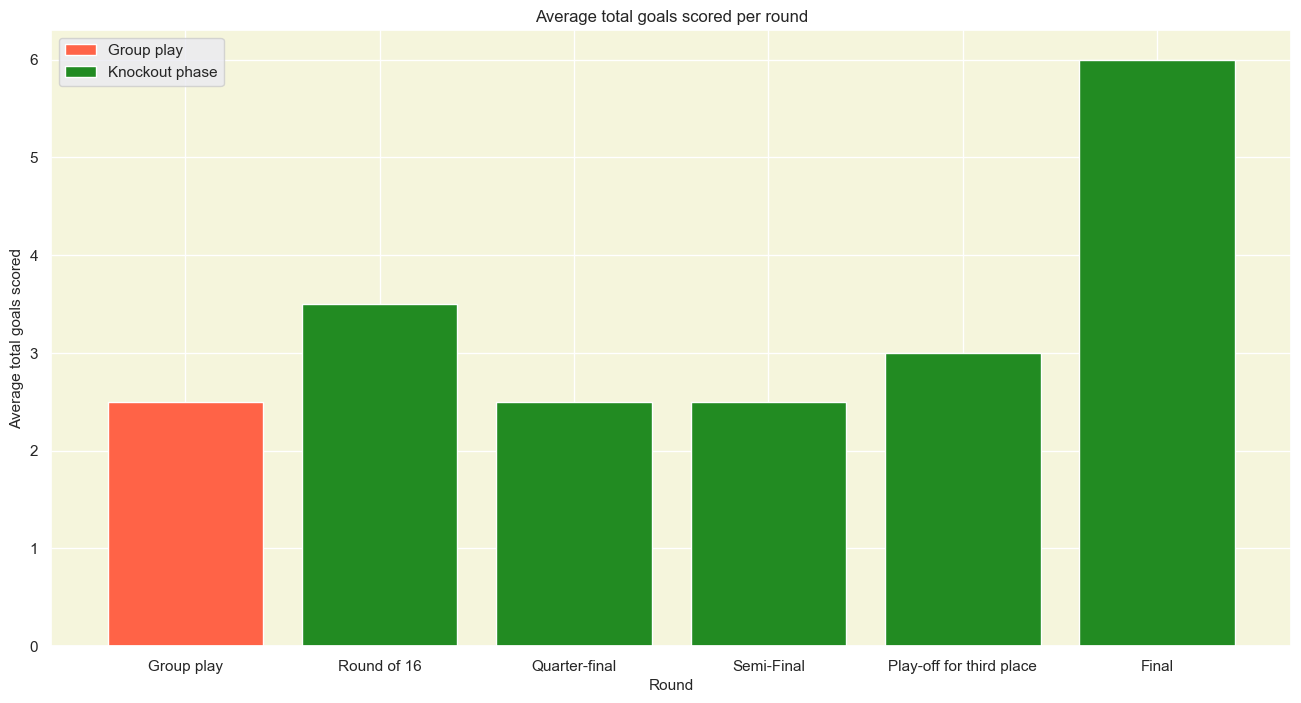

<Figure size 1600x800 with 0 Axes>

In [647]:
# Average total goals scored per round, chronologically ordered
avg_tg_round = wc2022.groupby('rounds').mean('total_goals').sort_values(by=['match_no'])['total_goals']

# Illustrate average number of total goals score per type of round
ax = plt.subplot()

# show group play bar as first bar
plt.bar(0, avg_tg_round.loc['Group play'],
       color = 'tomato', label = 'Group play')

# show remaining bars as knockout rounds
plt.bar(range(1, 1+len(avg_tg_round.index[1:])), 
        avg_tg_round.values[1:],
        color = 'forestgreen', label = 'Knockout phase')
plt.xlabel('Round', size=11)
plt.ylabel('Average total goals scored', size=11)
plt.title('Average total goals scored per round')
plt.legend(labels)
ax.set_xticks(range(len(wc2022.groupby('rounds'))))
ax.set_xticklabels(wc2022.rounds.unique())
ax.set_facecolor("beige")
plt.show()
plt.clf()

In [565]:
wc2022[wc2022.rounds=='Play-off for third place'].loc[:, 'match_no':'2_goals']

,match_no,day_of_week,date,hour,venue,referee,group,team1,team2,attendance,1_xg,2_xg,1_poss,2_poss,1_goals,2_goals
62,63,Sat,17-Dec-22,16:00,Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Play-off for third place,CROATIA,MOROCCO,44137,0.7,1.2,50,50,2,1


In [656]:
# create teams-level dataframe 
teams = pd.DataFrame({'games_played': wc2022.team1.value_counts(),
                     'total_goals': wc2022.groupby(['team1'])['1_goals'].sum().sort_index() + 
                      wc2022.groupby('team2')['2_goals'].sum().sort_index(),
                     'total_goals_prevented': wc2022.groupby(['team1'])['1_goal_prevented'].sum().sort_index() + 
                      wc2022.groupby('team2')['2_goal_prevented'].sum().sort_index(),
                     'expected_goals': wc2022.groupby(['team1'])['1_xg'].sum().sort_index() + 
                      wc2022.groupby('team2')['2_xg'].sum().sort_index(),
                     'yellow_cards': wc2022.groupby(['team1'])['1_yellow_cards'].sum().sort_index() + 
                      wc2022.groupby('team2')['2_yellow_cards'].sum().sort_index()})
teams['diff_actual_expected'] = teams.total_goals - teams.expected_goals
print(teams)

                games_played  total_goals  total_goals_prevented  \
ARGENTINA                  5           15                     45   
AUSTRALIA                  1            4                     63   
BELGIUM                    2            1                     43   
BRAZIL                     3            8                     34   
CAMEROON                   2            4                     44   
CANADA                     1            2                     29   
COSTA RICA                 1            3                     63   
CROATIA                    4            8                     82   
DENMARK                    1            1                     40   
ECUADOR                    1            4                     22   
ENGLAND                    4           13                     45   
FRANCE                     4           16                     80   
GERMANY                    1            6                     27   
GHANA                      1            5       

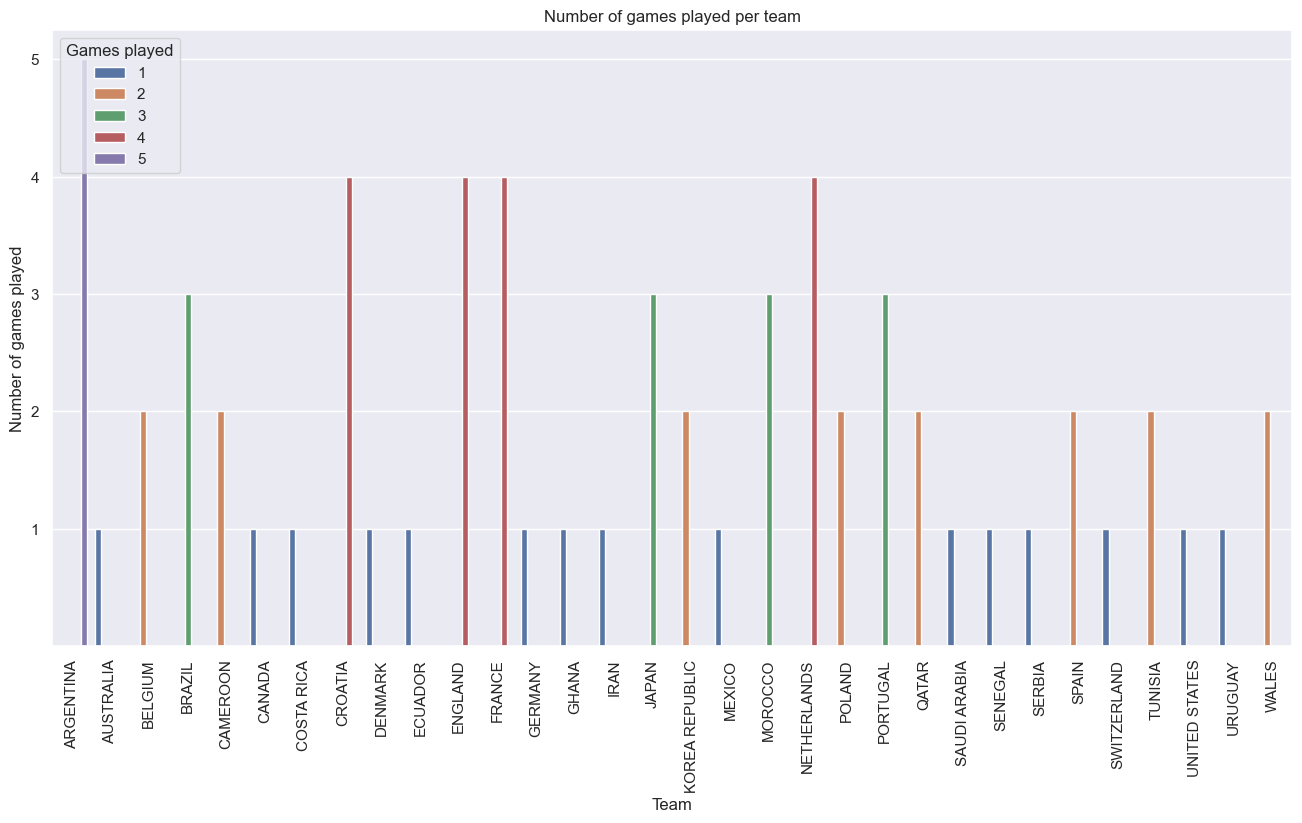

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [624]:
# Illustrate total games played per team
ax2 = plt.subplot()
ax2 = sns.barplot(data=teams, x=teams.index, y="games_played", hue='games_played')
sns.set(rc={'figure.figsize':(16,8)})
ax2.set_xlabel('Team')
ax2.set_ylabel('Number of games played')
ax2.set_title('Number of games played per team')
ax2.tick_params(axis='x', rotation=90)
ax2.set_yticks(range(1,1+teams.games_played.max()))
ax2.legend(title='Games played', loc='upper left')
plt.show()
plt.clf()
plt.show()
plt.clf()

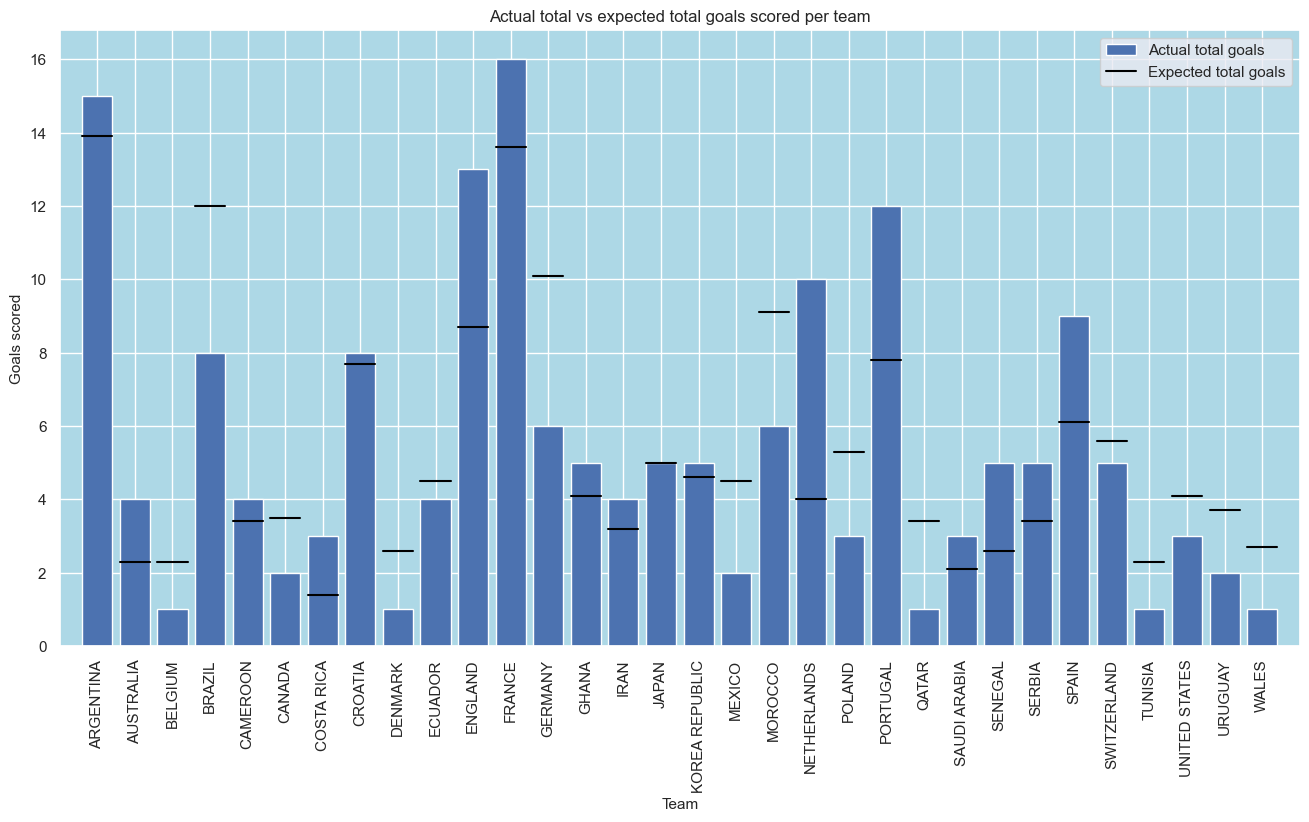

<Figure size 1600x800 with 0 Axes>

In [643]:
# Illustrate expected total goals vs actual total goals
ax3 = plt.subplot()

bars = plt.bar(range(len(teams.index)), teams.total_goals, label = 'Actual total goals')
plt.xlim([-1, 32])
for i in range(len(teams.index)):
    line = plt.axhline(y=teams.expected_goals[i], xmin=(i+0.6)/33, xmax=(i+1.4)/33,
                       color='black', label = 'Expected total goals')
plt.xlabel('Team', size=11)
plt.ylabel('Goals scored', size=11)
plt.title('Actual total vs expected total goals scored per team')
plt.legend(handles = [bars, line], labels=['Actual total goals', 'Expected total goals'])
ax3.set_xticks(range(len(teams.index)))
ax3.set_xticklabels(teams.index)
ax3.tick_params(axis='x', rotation=90)
ax3.set_facecolor("lightblue")
plt.show()
plt.clf()

In [666]:
# Is round of play correlated with attendance?
# linear regression model

model = sm.OLS.from_formula('attendance ~ rounds', wc2022)
results = model.fit()

# illustrate how each round's attendance compares on average to that of the final
print(results.params)

Intercept                             88966.000000
rounds[T.Group play]                 -37777.270833
rounds[T.Play-off for third place]   -44829.000000
rounds[T.Quarter-final]              -27660.750000
rounds[T.Round of 16]                -37514.875000
rounds[T.Semi-Final]                 -10336.000000
dtype: float64


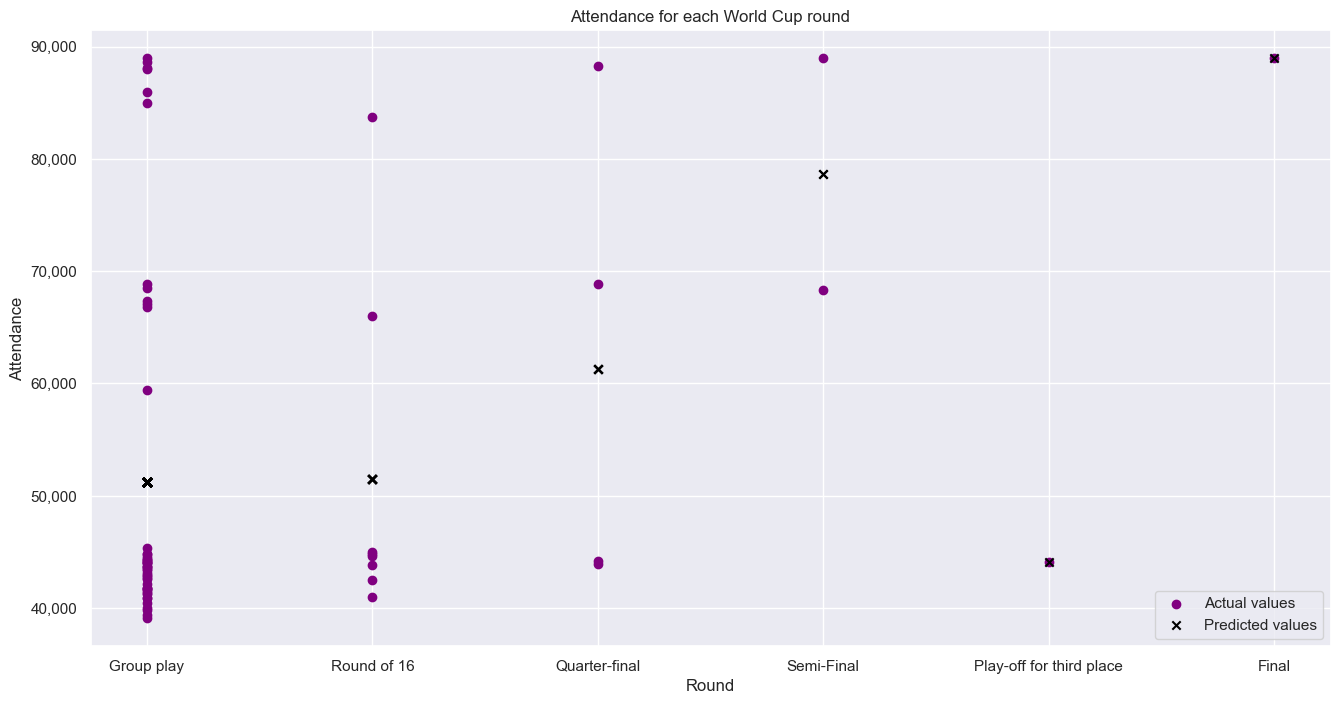

In [675]:
# illustrate actual attendance per round versus predicted values
ax5 = plt.subplot()

# add commas to the y-axis labels
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.scatter(wc2022.rounds, wc2022.attendance, color = 'purple', label = 'Actual values')
plt.xlabel('Round')
plt.ylabel('Attendance')
plt.title('Attendance for each World Cup round')
plt.scatter(wc2022.rounds, results.predict(wc2022.rounds), color = 'black', marker = "x", label='Predicted values')
plt.legend()